In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
glass = pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
glass['total'] = glass.drop(['RI','Type'],axis = 1).sum(axis = 1)
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,total
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,99.82
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,99.89
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,99.78
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,99.59
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,99.83
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,99.95
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,99.96
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,99.88
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,99.98


In [ ]:
glass = glass.drop('total',axis =1)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


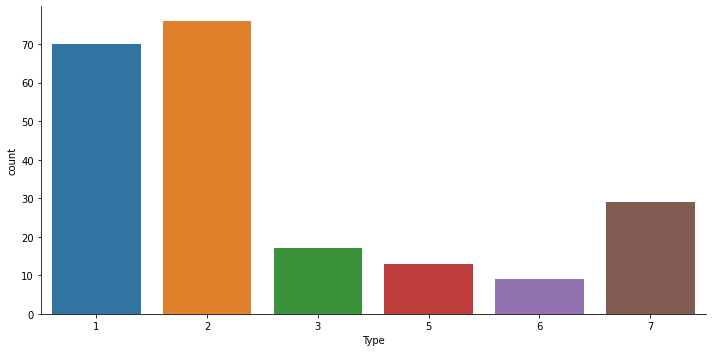

In [ ]:
import seaborn as sns
sns.factorplot('Type', data=glass, kind="count",size = 5,aspect = 2)

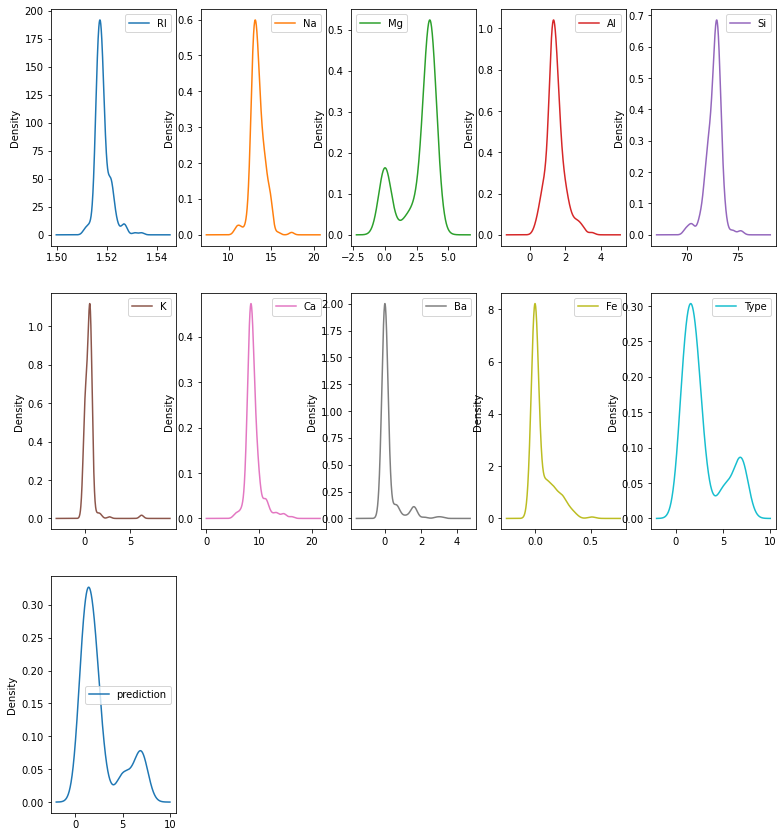

In [ ]:
glass.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

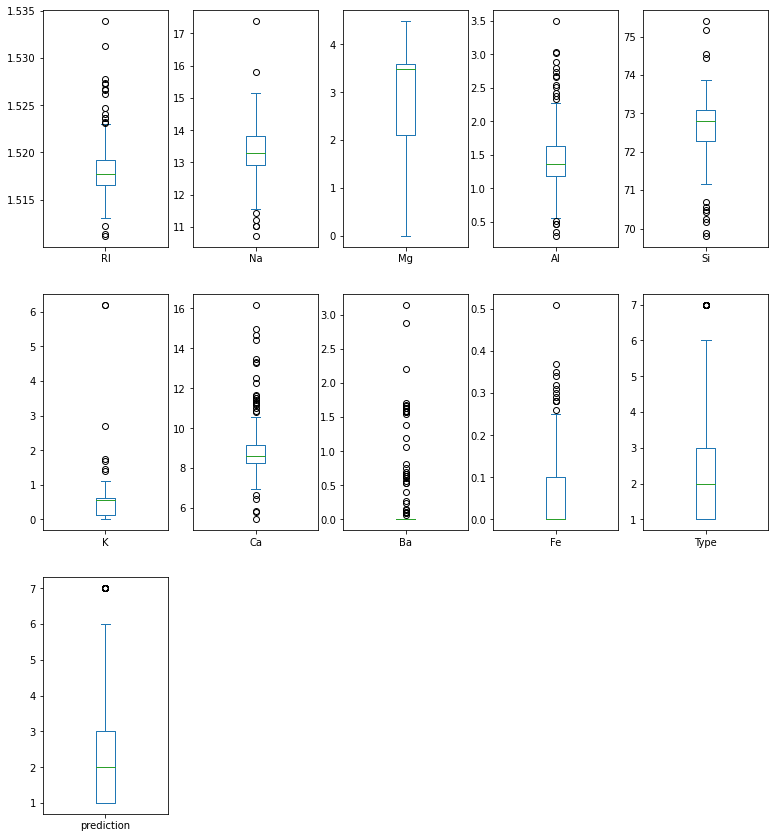

In [ ]:
glass.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

In [ ]:
x = glass.drop('Type',axis = 1)
y = glass['Type']

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for  i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

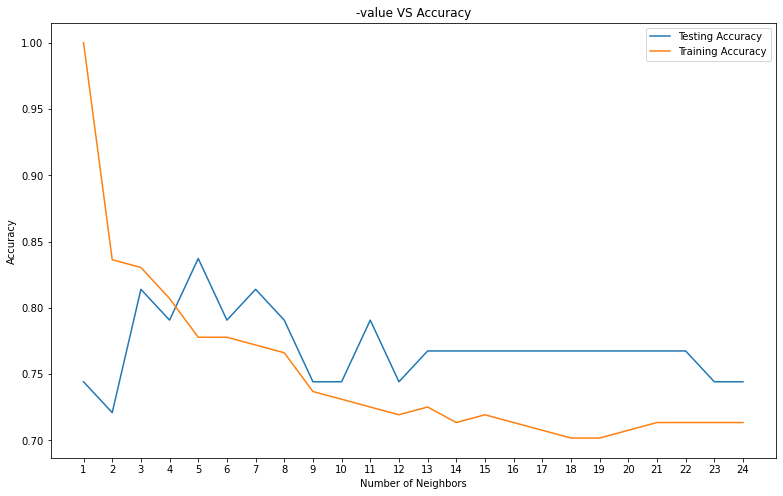

In [ ]:
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
clasifier = knn.fit(x_train,y_train)
clas = knn.predict(x)
glass['prediction'] = clas
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,prediction
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,2
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,2
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,7


In [ ]:
n = 0
for i in range(0,len(clas)):
    correct = y.iloc[i]-clas[i]
    if correct == 0:
        n = n+1
    else:
        n= n+0
eficay = 100*n/len(clas)
print('the model is ', eficay, '% efficient')
    

the model is  82.71028037383178 % efficient
